# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 2.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
159785,0.1050,0.2612,0.0537,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,1,0,8,0
334038,0.7886,0.7153,0.1099,0.5688,0.0293,0.0024,0.0244,0.3955,0.3076,0.2661,5,5,10,10
337619,0.0757,0.1367,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
308283,0.4126,0.3955,0.0830,0.3857,0.1660,0.0122,0.1660,1.0205,0.1978,0.9473,7,7,7,7
24732,0.5396,0.0464,0.1929,0.0854,0.0024,0.0024,0.0024,0.1807,0.4468,0.0293,10,10,3,3


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472501 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          472501 non-null  float64
 1   Emg2          472501 non-null  float64
 2   Emg3          472501 non-null  float64
 3   Emg4          472501 non-null  float64
 4   Emg5          472501 non-null  float64
 5   Emg6          472501 non-null  float64
 6   Emg7          472501 non-null  float64
 7   Emg8          472501 non-null  float64
 8   Emg9          472501 non-null  float64
 9   Emg10         472501 non-null  float64
 10  repetition    472501 non-null  int64  
 11  rerepetition  472501 non-null  int64  
 12  stimulus      472501 non-null  int64  
 13  restimulus    472501 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.5 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000
mean,0.449598,0.369994,0.165067,0.110990,0.056133,0.014915,0.042496,0.302602,0.260029,0.219605,3.124415,2.194270,5.539897,3.961033
std,0.549594,0.394968,0.285421,0.240335,0.265131,0.047967,0.110609,0.505100,0.485920,0.424508,3.479845,3.242834,6.570169,6.186865
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.100100,0.114700,0.004900,0.002400,0.002400,0.002400,0.002400,0.014600,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.234400,0.263700,0.043900,0.002400,0.002400,0.002400,0.002400,0.095200,0.002400,0.063500,2.000000,0.000000,3.000000,0.000000
75%,0.590800,0.502900,0.192900,0.092800,0.009800,0.002400,0.024400,0.371100,0.324700,0.244100,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.663100,3.886700,3.313000,4.663100,1.196300,1.621100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204101
8      15513
2      15511
7      15508
12     15504
4      15495
5      15490
6      15478
11     15473
9      15471
10     15448
3      15445
1      15427
17     10345
14     10345
13     10341
15     10313
16     10282
21      5194
19      5185
20      5178
18      5176
22      5151
23      5127
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.813756,-0.710291,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
1,-0.813756,-0.768316,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
2,-0.805569,-0.808981,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
3,-0.809662,-0.855353,-0.611593,-0.504274,-0.223238,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
4,-0.809662,-0.884366,-0.611593,-0.504274,-0.214670,-0.289385,-0.39416,-0.633016,-0.584607,-0.538362
...,...,...,...,...,...,...,...,...,...,...
386608,-0.614017,-0.007807,-0.524071,-0.504274,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362
386609,-0.622204,-0.042527,-0.540014,-0.504274,-0.223238,-0.289385,-0.39416,-0.623994,-0.584607,-0.538362
386610,-0.609752,-0.007807,-0.547822,-0.494660,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362
386611,-0.626468,-0.077484,-0.571899,-0.504274,-0.223238,-0.289385,-0.39416,-0.619390,-0.584607,-0.538362


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
77/77 [==============================] - 3s 27ms/step - loss: 1.3191 - accuracy: 0.6428 - val_loss: 0.9312 - val_accuracy: 0.7384
Epoch 2/100
77/77 [==============================] - 2s 25ms/step - loss: 0.8444 - accuracy: 0.7578 - val_loss: 0.7663 - val_accuracy: 0.7794
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 0.7224 - accuracy: 0.7891 - val_loss: 0.6627 - val_accuracy: 0.8050
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 0.6480 - accuracy: 0.8089 - val_loss: 0.6184 - val_accuracy: 0.8187
Epoch 5/100
77/77 [==============================] - 2s 25ms/step - loss: 0.5950 - accuracy: 0.8240 - val_loss: 0.5691 - val_accuracy: 0.8318
Epoch 6/100
77/77 [==============================] - 2s 25ms/step - loss: 0.5549 - accuracy: 0.8346 - val_loss: 0.5362 - val_accuracy: 0.8396
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 0.5192 - accuracy: 0.8444 - val_loss: 0.5149 - val_accuracy: 0.8458
Epoch 

77/77 [==============================] - 2s 26ms/step - loss: 0.1551 - accuracy: 0.9514 - val_loss: 0.1904 - val_accuracy: 0.9418
Epoch 59/100
77/77 [==============================] - 2s 26ms/step - loss: 0.1545 - accuracy: 0.9515 - val_loss: 0.1930 - val_accuracy: 0.9413
Epoch 60/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1504 - accuracy: 0.9529 - val_loss: 0.1936 - val_accuracy: 0.9408
Epoch 61/100
77/77 [==============================] - 2s 28ms/step - loss: 0.1519 - accuracy: 0.9521 - val_loss: 0.2007 - val_accuracy: 0.9412
Epoch 62/100
77/77 [==============================] - 2s 28ms/step - loss: 0.1471 - accuracy: 0.9538 - val_loss: 0.1864 - val_accuracy: 0.9438
Epoch 63/100
77/77 [==============================] - 2s 26ms/step - loss: 0.1443 - accuracy: 0.9545 - val_loss: 0.2031 - val_accuracy: 0.9409
Epoch 64/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1562 - accuracy: 0.9513 - val_loss: 0.1800 - val_accuracy: 0.9457
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

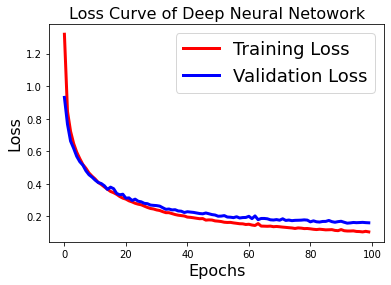

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

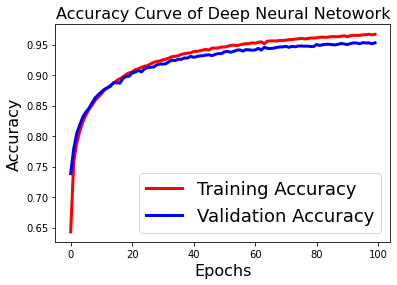

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([1, 0, 0, ..., 0, 8, 0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

13

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 95.29635425423226


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     40068
           1       0.94      0.94      0.94      2251
           2       0.95      0.93      0.94      2182
           3       0.93      0.91      0.92      2147
           4       0.94      0.93      0.94      2123
           5       0.93      0.93      0.93      2111
           6       0.96      0.93      0.95      2101
           7       0.94      0.95      0.94      2141
           8       0.93      0.88      0.90      2000
           9       0.90      0.92      0.91      2162
          10       0.95      0.87      0.91      2196
          11       0.91      0.94      0.92      2200
          12       0.93      0.91      0.92      1943
          13       0.95      0.93      0.94      1420
          14       0.84      0.86      0.85      1351
          15       0.87      0.84      0.85      1250
          16       0.93      0.94      0.93      1519
 

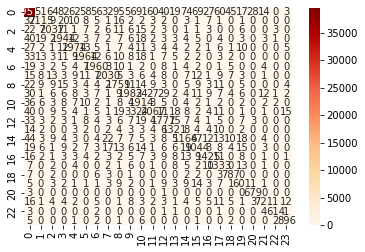

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3377261616853976
MSE: 3.711702856847251
RMSE: 1.9265780173269005


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9528639149409436
Recall Score :  0.9529635425423225
f1_score :  0.9527242538968735
